In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import math

D:\coding programs\python\anaconde-new\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('D://ASDC//Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<h5>check missing values

In [5]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<h5>check duplicates

In [6]:
data.duplicated().sum()

0

<h5>check columns datatypes

In [7]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Univariant Analysis

<h3>'CustomerID'column

In [8]:
print("number of unique customer Id's: ",len(data.CustomerID.unique()))

number of unique customer Id's:  200


<h3>'Gender'column

In [9]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [10]:
data.Gender.value_counts(1).round(2)*100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

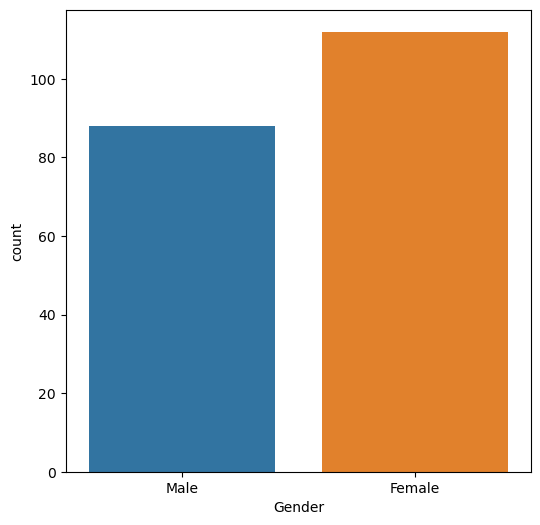

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['Gender'], data=data)
plt.show()

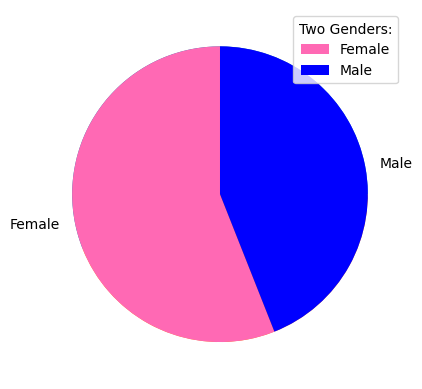

In [12]:
y=data['Gender'].value_counts()
plt.pie(y)
mylabels = ["Female","Male"]

mycolors = ["hotpink", "blue"]
plt.pie(y, labels = mylabels,colors=mycolors,startangle = 90)
plt.legend(title = "Two Genders:")

plt.show() 

<h3>'Age'column

In [13]:
print('smallest age available:',data.Age.min(),"years")
print('youngest age available:',data.Age.max(),"years")

smallest age available: 18 years
youngest age available: 70 years


<h3>check outliers

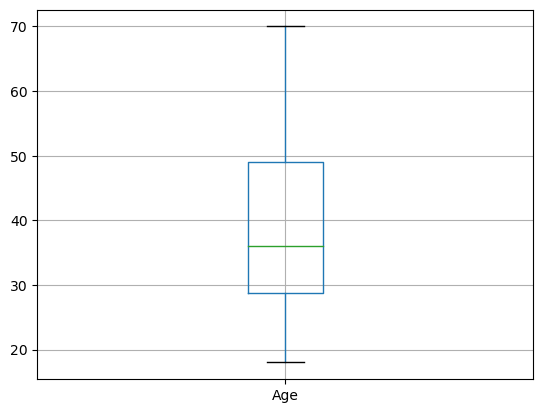

In [14]:
data.boxplot(column=['Age'])
plt.show()

In [15]:
print('Average age available:',math.ceil(data.Age.mean()),"years")

Average age available: 39 years


In [16]:
print('Number of customers above the Average age',data['Age'].loc[data['Age']>39].count())

Number of customers above the Average age 84


In [17]:
print('Number of customers below the Average age',data['Age'].loc[data['Age']<39].count())

Number of customers below the Average age 113


In [18]:
print('Number of customers equlas the Average age',data['Age'].loc[data['Age']==39].count())

Number of customers equlas the Average age 3


<h3>'Annual Income' column 

In [19]:
data.rename(columns = {'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'}, inplace = True)
data

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
print('minimum Annual Income:',data.Annual_Income.min(),'k($)')
print('maximum Annual Income:',data.Annual_Income.max(),'k($)')

minimum Annual Income: 15 k($)
maximum Annual Income: 137 k($)


<h5>check outliers

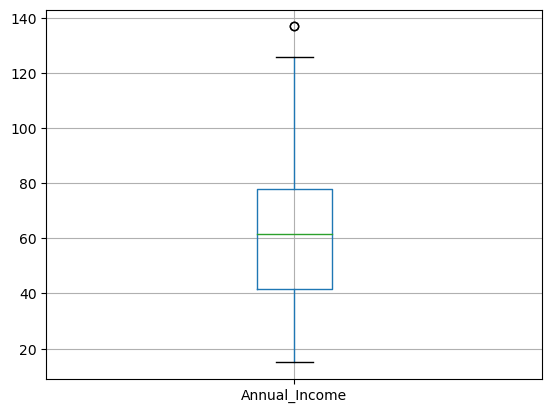

In [21]:
data.boxplot(column=['Annual_Income'])
plt.show()

In [22]:
print('Average Annual Income: ',data.Annual_Income.mean(),'k($)')

Average Annual Income:  60.56 k($)


In [23]:
print('Number of customers paied above Average Annual Income:',data['Annual_Income'].loc[data['Annual_Income']>data.Annual_Income.mean()].count())

Number of customers paied above Average Annual Income: 102


In [24]:
print('Number of customers paied below Average Annual Income:',data['Annual_Income'].loc[data['Annual_Income']<data.Annual_Income.mean()].count())

Number of customers paied below Average Annual Income: 98


<h3>'Spending Score' column

In [25]:
print('minimum Spending Score:',data.Spending_Score.min())
print('maximum Spending Score :',data.Spending_Score.max())
#print('minimum Annual Income: ',data.Annual Income.min())

minimum Spending Score: 1
maximum Spending Score : 99


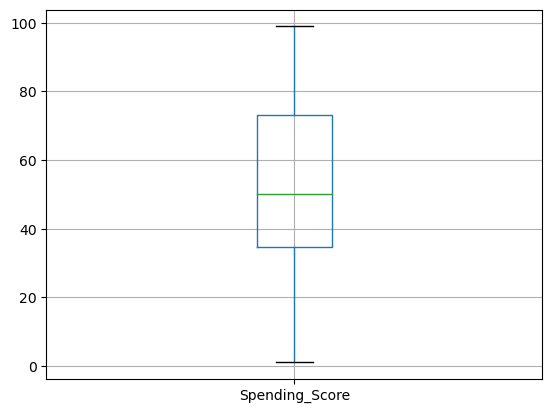

In [26]:
data.boxplot(column=['Spending_Score'])
plt.show()

In [27]:
print('Average Spending Score: ',math.floor(data.Spending_Score.mean()))

Average Spending Score:  50


In [28]:
print('Number of customers have above Average Spending Score:',data['Spending_Score'].loc[data['Spending_Score']>data.Annual_Income.mean()].count())

Number of customers have above Average Spending Score: 62


In [29]:
print('Number of customers have below Average Spending Score:',data['Spending_Score'].loc[data['Spending_Score']<data.Annual_Income.mean()].count())

Number of customers have below Average Spending Score: 138


# Bivariant Analysis

<h2>Important Insights

<h5>Gender of customer above age average

In [30]:
data['Gender'][data['Age']>data['Age'].mean()].value_counts()

Female    46
Male      41
Name: Gender, dtype: int64

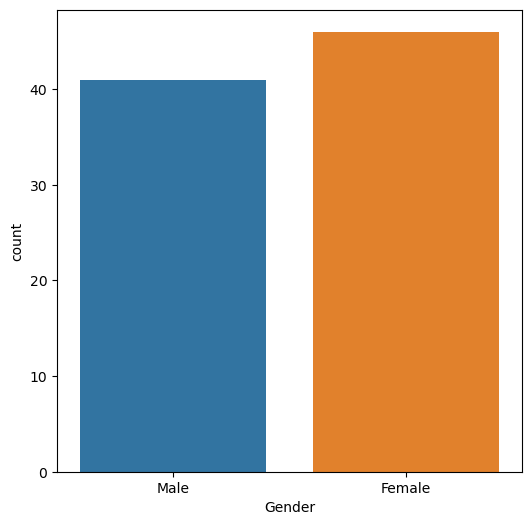

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['Gender'][data['Age']>data['Age'].mean()], data=data)
plt.show()

<h5>Gender of customer Spending above Score average

In [32]:
data['Gender'][data['Spending_Score']>data['Spending_Score'].mean()].value_counts()

Female    53
Male      44
Name: Gender, dtype: int64

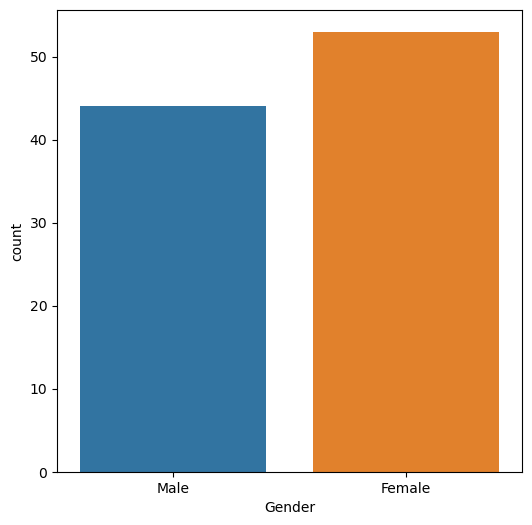

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['Gender'][data['Spending_Score']>data['Spending_Score'].mean()], data=data)
plt.show()

<h5>Gender of customer paid above Annual Income

In [34]:
data['Gender'][data['Annual_Income']>data['Annual_Income'].mean()].value_counts()

Female    53
Male      49
Name: Gender, dtype: int64

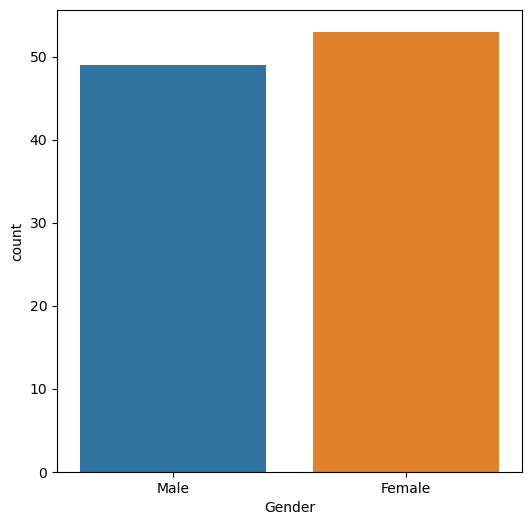

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['Gender'][data['Annual_Income']>data['Annual_Income'].mean()], data=data)
plt.show()

<h5>Age of customers paid above Annual Income

In [36]:
data['Age'][data['Annual_Income']>data['Annual_Income'].mean()].value_counts()

32    9
19    5
38    5
36    5
30    5
34    4
28    4
31    3
39    3
40    3
27    3
29    3
47    3
35    3
49    3
59    2
44    2
25    2
37    2
33    2
41    2
48    2
43    2
20    2
23    2
54    2
66    2
50    2
26    1
46    1
58    1
52    1
67    1
42    1
21    1
56    1
68    1
57    1
65    1
18    1
63    1
51    1
45    1
Name: Age, dtype: int64

<h5>Age of customers above average Spending Score

In [37]:
data['Age'][data['Spending_Score']>data['Spending_Score'].mean()].value_counts()

32    8
30    7
35    6
31    6
21    4
27    4
24    4
29    4
38    4
23    4
28    3
39    3
19    3
36    3
49    3
22    3
26    2
20    2
40    2
34    2
18    2
33    2
67    2
50    2
70    2
60    1
45    1
59    1
63    1
55    1
54    1
68    1
65    1
25    1
57    1
Name: Age, dtype: int64

# Top 20 insights

In [38]:
total_score = data.groupby('Age')['Spending_Score'].sum()
top_20_scores = total_score.sort_values(ascending=False).head(20)
top_20_scores

Age
32    726
35    575
30    562
31    511
29    383
23    380
38    379
27    362
21    334
19    318
36    315
49    299
24    286
40    285
28    280
39    254
18    240
50    229
22    210
48    209
Name: Spending_Score, dtype: int64

In [39]:
total_Annual_Income = data.groupby('Age')['Annual_Income'].sum()
#total_Annual_Income
top_20_Annual_Income = total_Annual_Income.sort_values(ascending=False).head(20)
top_20_Annual_Income

Age
32    959
30    533
36    486
19    456
38    447
47    421
35    420
34    395
31    387
27    379
40    370
49    357
28    341
29    318
50    293
48    291
59    261
23    249
33    241
54    239
Name: Annual_Income, dtype: int64

In [40]:
data

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [41]:
data_sorted_Spending_Score = data.sort_values(['Spending_Score'], ascending=(False))
data_sorted_Spending_Score.head(20)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
11,12,Female,35,19,99
19,20,Female,35,23,98
145,146,Male,28,77,97
185,186,Male,30,99,97
127,128,Male,40,71,95
167,168,Female,33,86,95
7,8,Female,23,18,94
141,142,Male,32,75,93
163,164,Female,31,81,93
41,42,Male,24,38,92


In [42]:
data_sorted_annual_income = data.sort_values(['Annual_Income'], ascending=(False))
data_sorted_annual_income.head(20)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
199,200,Male,30,137,83
198,199,Male,32,137,18
197,198,Male,32,126,74
196,197,Female,45,126,28
195,196,Female,35,120,79
194,195,Female,47,120,16
193,194,Female,38,113,91
192,193,Male,33,113,8
190,191,Female,34,103,23
189,190,Female,36,103,85
